# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [12]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

* **Hay 10 atributos en los datos**

    Edad: La edad del paciente.

    Sexo: El sexo del paciente (0 = mujer, 1 = hombre).

    Índice de masa corporal (BMI): Una medida que relaciona el peso y la altura del paciente.

    Presión arterial media: La presión arterial promedio del paciente.
    
    Seis mediciones de suero sanguíneo: Estas son medidas de diferentes componentes en la sangre que pueden estar relacionados con la progresión de la diabetes.

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

- **diabetes['data']** contiene las características de entrada (los 10 atributos mencionados) para cada paciente.

- **diabetes['target']** contiene la variable objetivo correspondiente, que es una medida cuantitativa de la progresión de la enfermedad un año después del inicio.

1. How many records are there in the data?

- El número de registros en los datos no se indica explícitamente en la descripción proporcionada. Sin embargo, el conjunto de datos de diabetes de sklearn generalmente contiene 442 muestras. Cada muestra representa los datos de un paciente, incluyendo las 10 características de entrada y la variable objetivo.

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes

# Cargamos el conjunto de datos
diabetes = load_diabetes()

# Exploramos la parte 'data'
print("Forma de diabetes.data:", diabetes.data.shape)
print("\nPrimeras 5 filas de diabetes.data:")
print(diabetes.data[:5])
print("\nNombres de las características:")
print(diabetes.feature_names)

# Exploramos la parte 'target'
print("\nForma de diabetes.target:", diabetes.target.shape)
print("\nPrimeros 5 valores de diabetes.target:")
print(diabetes.target[:5])

# Confirmamos la consistencia
n_samples, n_features = diabetes.data.shape
print(f"\nNúmero de muestras: {n_samples}")
print(f"Número de características: {n_features}")

Forma de diabetes.data: (442, 10)

Primeras 5 filas de diabetes.data:
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]

Nombres de las características:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Forma de diabetes.target: (442,)

Primeros 5 valores de diabetes.target:
[151.  75. 141. 206. 135.]

Número de muestras: 442
Número de características: 10


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [18]:
from sklearn import linear_model
# Importamos la clase LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [19]:
# Creamos una instancia del modelo de regresión lineal
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [23]:
# Cargamos los datos
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

split_index = -20  # Los últimos 20 registros serán para prueba

# Dividimos los datos en conjuntos de entrenamiento y prueba
diabetes_data_train = X[:split_index]
diabetes_target_train = y[:split_index]
diabetes_data_test = X[split_index:]
diabetes_target_test = y[split_index:]

print("Forma del conjunto de entrenamiento (datos):", diabetes_data_train.shape)
print("Forma del conjunto de entrenamiento (objetivo):", diabetes_target_train.shape)
print("Forma del conjunto de prueba (datos):", diabetes_data_test.shape)
print("Forma del conjunto de prueba (objetivo):", diabetes_target_test.shape)

Forma del conjunto de entrenamiento (datos): (422, 10)
Forma del conjunto de entrenamiento (objetivo): (422,)
Forma del conjunto de prueba (datos): (20, 10)
Forma del conjunto de prueba (objetivo): (20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

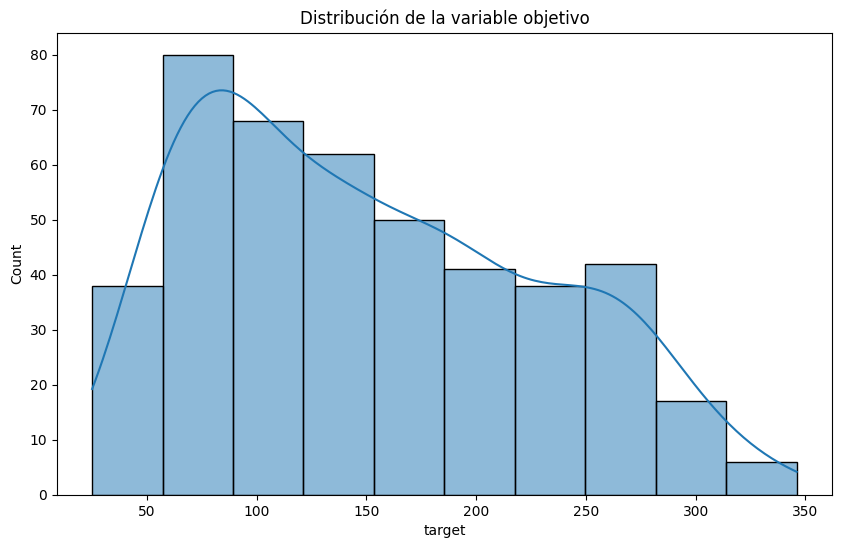

P-valor del test de normalidad para la variable objetivo: 0.0000


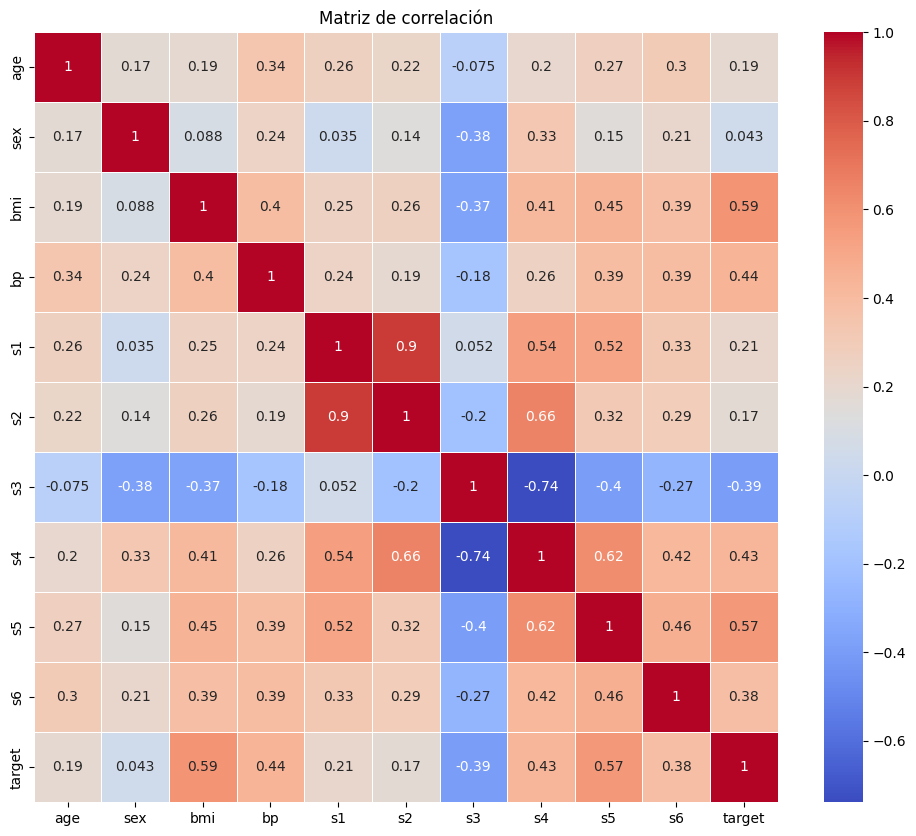

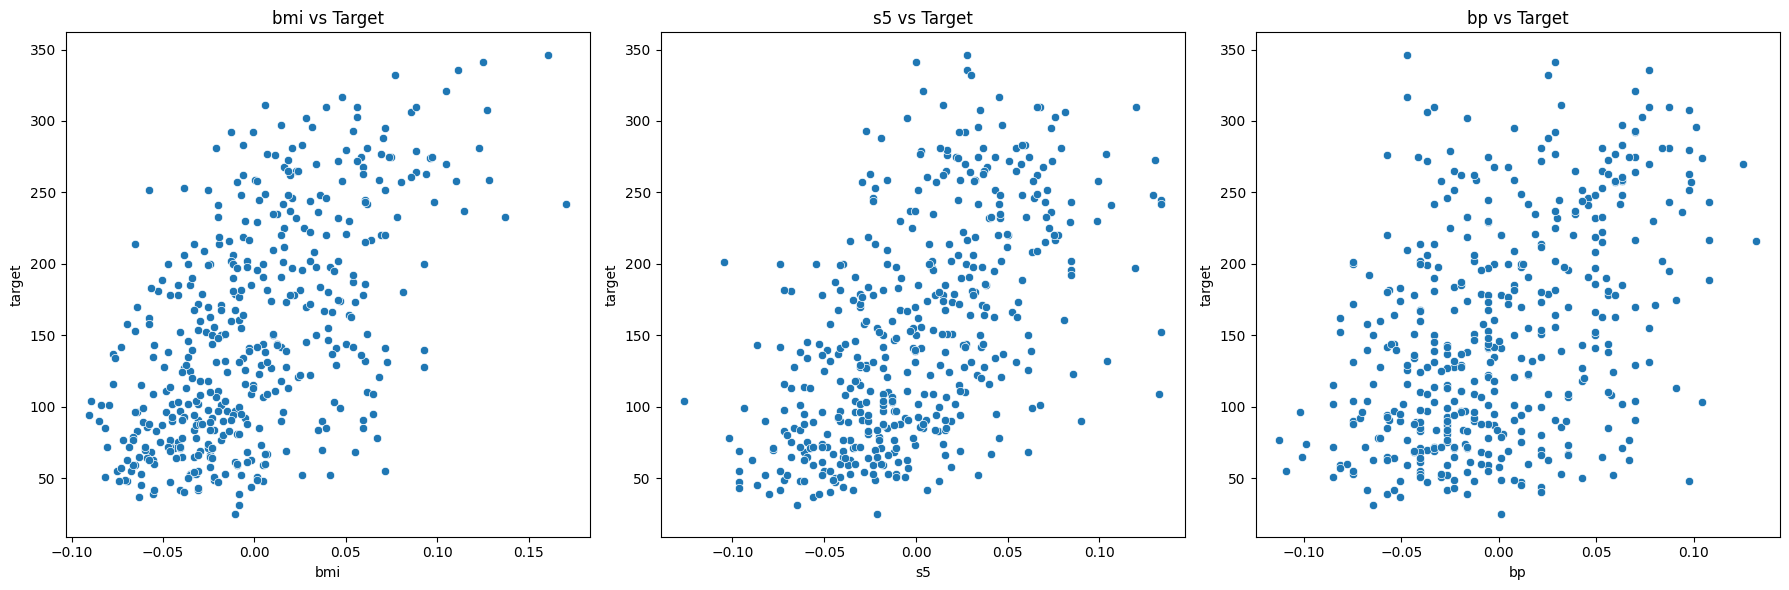

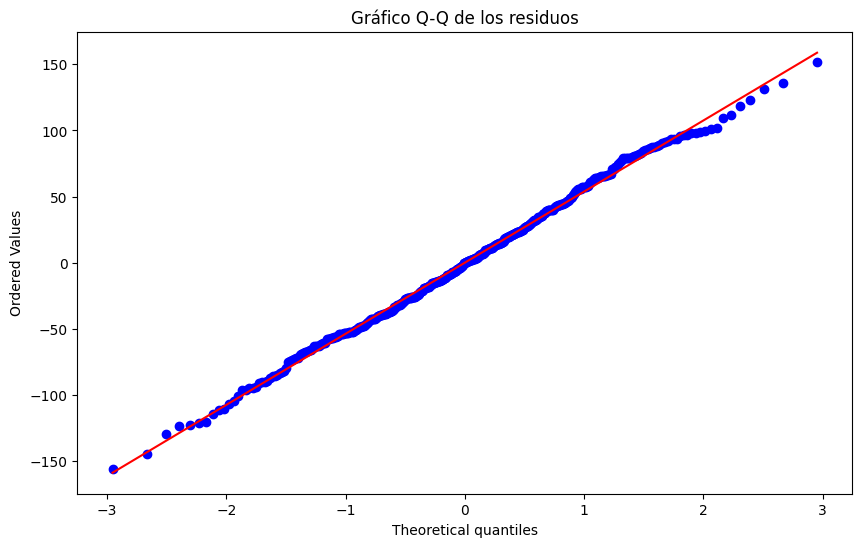

In [28]:
from scipy import stats

# Crear un DataFrame con los datos
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 1. Distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribución de la variable objetivo')
plt.show()

# 2. Prueba de normalidad para la variable objetivo
_, p_value = stats.normaltest(df['target'])
print(f"P-valor del test de normalidad para la variable objetivo: {p_value:.4f}")

# 3. Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# 4. Gráficos de dispersión para las características más correlacionadas
top_corr_features = df.corr()['target'].sort_values(ascending=False)[1:4].index
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, feature in enumerate(top_corr_features):
    sns.scatterplot(x=feature, y='target', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

# 5. Gráfico Q-Q para verificar la normalidad de los residuos

model = LinearRegression()
model.fit(df.drop('target', axis=1), df['target'])
residuals = df['target'] - model.predict(df.drop('target', axis=1))

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [30]:
# Creamos el modelo
diabetes_model = LinearRegression()

# Ajustamos el modelo con los datos de entrenamiento
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

# Imprimimos el intercepto
print("Intercepto:", diabetes_model.intercept_)

# Imprimimos los coeficientes
print("\nCoeficientes:")
for feature, coef in zip(diabetes.feature_names, diabetes_model.coef_):
    print(f"{feature}: {coef:.4f}")

Intercepto: 152.76429169049118

Coeficientes:
age: 0.3061
sex: -237.6356
bmi: 510.5380
bp: 327.7299
s1: -814.1119
s2: 492.7996
s3: 102.8412
s4: 184.6035
s5: 743.5094
s6: 76.0966


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + b*x1 + c*x2 + d*x3 + ....

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = diabetes_model.predict(diabetes_data_test)

# Imprimir las primeras 5 predicciones y sus valores reales correspondientes
print("Primeras 5 predicciones:")
for pred, real in zip(y_pred[:5], diabetes_target_test[:5]):
    print(f"Predicción: {pred:.2f}, Valor real: {real:.2f}")

# Calcular y mostrar el error cuadrático medio (MSE)
mse = mean_squared_error(diabetes_target_test, y_pred)
print(f"\nError cuadrático medio (MSE): {mse:.2f}")

# Calcular y mostrar el coeficiente de determinación R^2
r2 = r2_score(diabetes_target_test, y_pred)
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

Primeras 5 predicciones:
Predicción: 197.62, Valor real: 233.00
Predicción: 155.44, Valor real: 91.00
Predicción: 172.89, Valor real: 111.00
Predicción: 111.53, Valor real: 152.00
Predicción: 164.79, Valor real: 120.00

Error cuadrático medio (MSE): 2004.52
Coeficiente de determinación (R^2): 0.59


Cuando el coeficientes de determinacion es igual a 0 o proximo - el modelo no se ajusta bien a los datos

#### Print your `diabetes_target_test` and compare with the prediction. 

In [32]:
import numpy as np
from sklearn.metrics import r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = diabetes_model.predict(diabetes_data_test)

# Imprimir los valores reales y las predicciones
print("Comparación de valores reales y predicciones:")
print("Real\t\tPredicción\tDiferencia")
print("-" * 40)
for real, pred in zip(diabetes_target_test, y_pred):
    diff = real - pred
    print(f"{real:.2f}\t\t{pred:.2f}\t\t{diff:.2f}")

mae = np.mean(np.abs(diabetes_target_test - y_pred))
mse = np.mean((diabetes_target_test - y_pred)**2)
rmse = np.sqrt(mse)

print("\nEstadísticas:")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

# Calcular y mostrar el coeficiente de determinación R^2
r2 = r2_score(diabetes_target_test, y_pred)
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

Comparación de valores reales y predicciones:
Real		Predicción	Diferencia
----------------------------------------
233.00		197.62		35.38
91.00		155.44		-64.44
111.00		172.89		-61.89
152.00		111.53		40.47
120.00		164.79		-44.79
67.00		131.07		-64.07
310.00		259.12		50.88
94.00		100.48		-6.48
183.00		117.06		65.94
66.00		124.30		-58.30
173.00		218.37		-45.37
72.00		61.20		10.80
49.00		132.25		-83.25
64.00		120.33		-56.33
48.00		52.55		-4.55
178.00		194.04		-16.04
104.00		102.58		1.42
132.00		123.57		8.43
220.00		211.03		8.97
57.00		52.60		4.40

Estadísticas:
Error Absoluto Medio (MAE): 36.61
Error Cuadrático Medio (MSE): 2004.52
Raíz del Error Cuadrático Medio (RMSE): 44.77
Coeficiente de determinación (R^2): 0.59


#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

No, diabetes_target_test no es exactamente igual a la predicción del modelo. Para compararlos y cuantificar las diferencias, se puede utilizar varias métricas de error.

In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Ensure we have the predictions
y_pred = diabetes_model.predict(diabetes_data_test)

# Calculate various error metrics
mae = mean_absolute_error(diabetes_target_test, y_pred)
mse = mean_squared_error(diabetes_target_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(diabetes_target_test, y_pred)
mape = mean_absolute_percentage_error(diabetes_target_test, y_pred)

print("Error Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

# Calculate the range of the target variable for context
target_range = np.max(diabetes_target_test) - np.min(diabetes_target_test)
print(f"\nRange of target variable: {target_range:.2f}")

# Print a few actual vs predicted values
print("\nSample of Actual vs Predicted values:")
for actual, predicted in zip(diabetes_target_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}, Difference: {actual - predicted:.2f}")

Error Metrics:
Mean Absolute Error (MAE): 36.61
Mean Squared Error (MSE): 2004.52
Root Mean Squared Error (RMSE): 44.77
R-squared (R2) Score: 0.59
Mean Absolute Percentage Error (MAPE): 39.31%

Range of target variable: 262.00

Sample of Actual vs Predicted values:
Actual: 233.00, Predicted: 197.62, Difference: 35.38
Actual: 91.00, Predicted: 155.44, Difference: -64.44
Actual: 111.00, Predicted: 172.89, Difference: -61.89
Actual: 152.00, Predicted: 111.53, Difference: 40.47
Actual: 120.00, Predicted: 164.79, Difference: -44.79


#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Estandarizamos las características
scaler = StandardScaler()
diabetes_data_train_scaled = scaler.fit_transform(diabetes_data_train)
diabetes_data_test_scaled = scaler.transform(diabetes_data_test)

# 2. Ajustamos un nuevo modelo con todas las variables
new_model = LinearRegression()
new_model.fit(diabetes_data_train_scaled, diabetes_target_train)

# 3. Predecimos en el conjunto de prueba
y_pred_scaled = new_model.predict(diabetes_data_test_scaled)

# 4. Calculamos y mostramos métricas de error
mae_scaled = mean_absolute_error(diabetes_target_test, y_pred_scaled)
mse_scaled = mean_squared_error(diabetes_target_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(diabetes_target_test, y_pred_scaled)

print("Métricas del nuevo modelo (con estandarización):")
print(f"Error Absoluto Medio (MAE): {mae_scaled:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_scaled:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_scaled:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_scaled:.2f}")

# 5. Seleccionamos las características menos importantes (por ejemplo, eliminamos las que tienen coeficientes cercanos a cero)
coefficients = new_model.coef_
important_features_indices = np.argsort(np.abs(coefficients))[-5:]  # Mantener las 5 más importantes

# Creamos nuevos conjuntos de datos con solo las características seleccionadas
diabetes_data_train_reduced = diabetes_data_train[:, important_features_indices]
diabetes_data_test_reduced = diabetes_data_test[:, important_features_indices]

# Estandarizamos nuevamente los conjuntos reducidos
diabetes_data_train_reduced_scaled = scaler.fit_transform(diabetes_data_train_reduced)
diabetes_data_test_reduced_scaled = scaler.transform(diabetes_data_test_reduced)

# Ajustamos un nuevo modelo con las variables reducidas
reduced_model = LinearRegression()
reduced_model.fit(diabetes_data_train_reduced_scaled, diabetes_target_train)

# Predecimos en el conjunto de prueba reducido
y_pred_reduced = reduced_model.predict(diabetes_data_test_reduced_scaled)

# Calculamos y mostramos métricas de error para el modelo reducido
mae_reduced = mean_absolute_error(diabetes_target_test, y_pred_reduced)
mse_reduced = mean_squared_error(diabetes_target_test, y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(diabetes_target_test, y_pred_reduced)

print("\nMétricas del modelo reducido:")
print(f"Error Absoluto Medio (MAE): {mae_reduced:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_reduced:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_reduced:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_reduced:.2f}")

Métricas del nuevo modelo (con estandarización):
Error Absoluto Medio (MAE): 36.61
Error Cuadrático Medio (MSE): 2004.52
Raíz del Error Cuadrático Medio (RMSE): 44.77
Coeficiente de Determinación (R²): 0.59

Métricas del modelo reducido:
Error Absoluto Medio (MAE): 37.17
Error Cuadrático Medio (MSE): 2097.18
Raíz del Error Cuadrático Medio (RMSE): 45.79
Coeficiente de Determinación (R²): 0.57
